<a href="https://colab.research.google.com/github/Mahin934/ML-Repo-CSE-475/blob/main/CSE475_LAb_3(Anemia_Diagnosis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Name: Mahin Mia   

## Id:2021-1-60-044

## Kaggle Install

In [ ]:
pip install kaggle


## Load the Data

In [ ]:
# Step 1: Move the kaggle.json file to the correct location
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 2: Download the dataset
!kaggle datasets download -d zeesolver/uhygtttt

# Step 3: Extract the dataset
import zipfile

zip_file = "uhygtttt.zip"  # Specify the downloaded zip file
output_folder = "uhygtttt_data"  # Directory to extract the data

# Extract the dataset
with zipfile.ZipFile(zip_file, "r") as zip_ref:
    zip_ref.extractall(output_folder)

print(f"Dataset extracted to '{output_folder}'.")

# Step 4: Load the dataset into a Pandas DataFrame
import pandas as pd

# Replace 'output.csv' with the actual CSV file name in the extracted folder
csv_file = f"{output_folder}/output.csv"  # Adjust file name if different
df = pd.read_csv(csv_file)

# Display the first few rows
print(df.head())

# Print the shape of the DataFrame to check for 0 rows
print(f"Shape of the DataFrame: {df.shape}")  # Added this line for debugging

# Summary statistics
print(df.describe())

# Data types
print(df.info())


mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/zeesolver/uhygtttt
License(s): apache-2.0
uhygtttt.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset extracted to 'uhygtttt_data'.
   Number Sex  %Red Pixel  %Green pixel  %Blue pixel    Hb Anaemic
0       1   M     43.2555       30.8421      25.9025   6.3     Yes
1       2   F     45.6033       28.1900      26.2067  13.5      No
2       3  F      45.0107       28.9677      26.0215  11.7      No
3       4   F     44.5398       28.9899      26.4703  13.5      No
4       5  M      43.2870       30.6972      26.0158  12.4      No
Shape of the DataFrame: (104, 7)
           Number  %Red Pixel  %Green pixel  %Blue pixel          Hb
count  104.000000  104.000000    104.000000   104.000000  104.000000
mean    52.500000   45.654175     28.875507    25.470325   12.150962
std 

## Feature Engineering

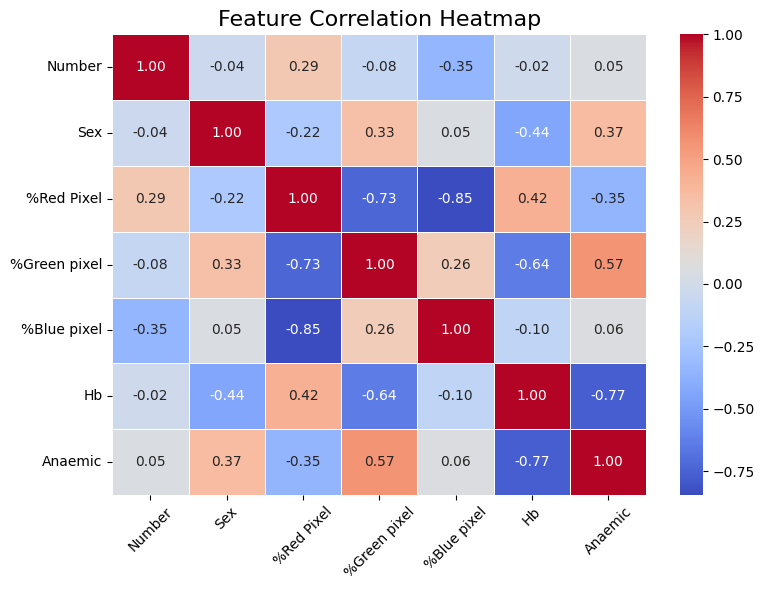

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Preprocessing
# Encode categorical variables
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})
df['Anaemic'] = df['Anaemic'].map({'No': 0, 'Yes': 1})

# Features and target selection
X = df[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb']]
y = df['Anaemic']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Data Visualization
# Compute correlation matrix
corr = df.corr()

# Plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-48-61622da61bd4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Anaemic', y='%Red Pixel', data=df, palette='coolwarm')
<ipython-input-48-61622da61bd4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Anaemic', y='%Green pixel', data=df, palette='coolwarm')
<ipython-input-48-61622da61bd4>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Anaemic', y='%Blue pixel', data=df, palette='coolwarm')
<ipython-input-48-61622da61bd4>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remo

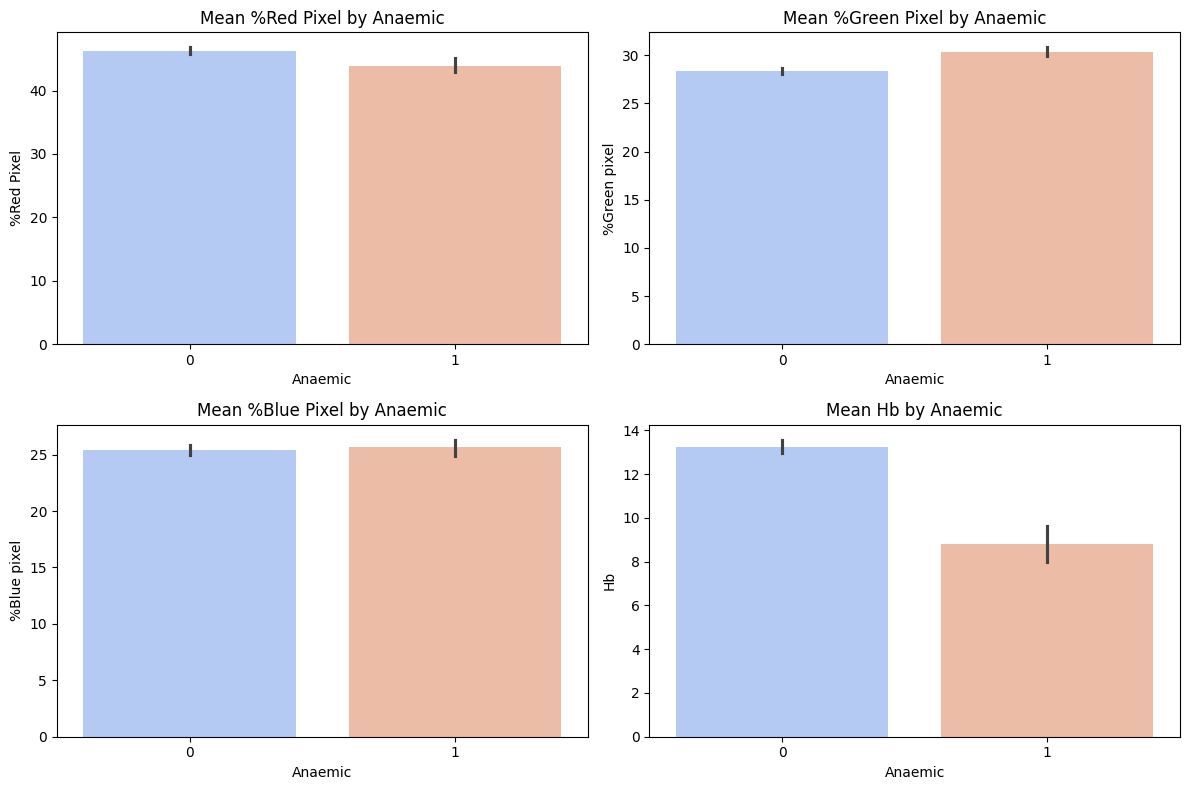

In [ ]:
# Bar plot to compare the mean of features for each class of Anaemic
plt.figure(figsize=(12, 8))

# Red Pixel
plt.subplot(2, 2, 1)
sns.barplot(x='Anaemic', y='%Red Pixel', data=df, palette='coolwarm')
plt.title('Mean %Red Pixel by Anaemic')

# Green Pixel
plt.subplot(2, 2, 2)
sns.barplot(x='Anaemic', y='%Green pixel', data=df, palette='coolwarm')
plt.title('Mean %Green Pixel by Anaemic')

# Blue Pixel
plt.subplot(2, 2, 3)
sns.barplot(x='Anaemic', y='%Blue pixel', data=df, palette='coolwarm')
plt.title('Mean %Blue Pixel by Anaemic')

# Hb
plt.subplot(2, 2, 4)
sns.barplot(x='Anaemic', y='Hb', data=df, palette='coolwarm')
plt.title('Mean Hb by Anaemic')

plt.tight_layout()
plt.show()

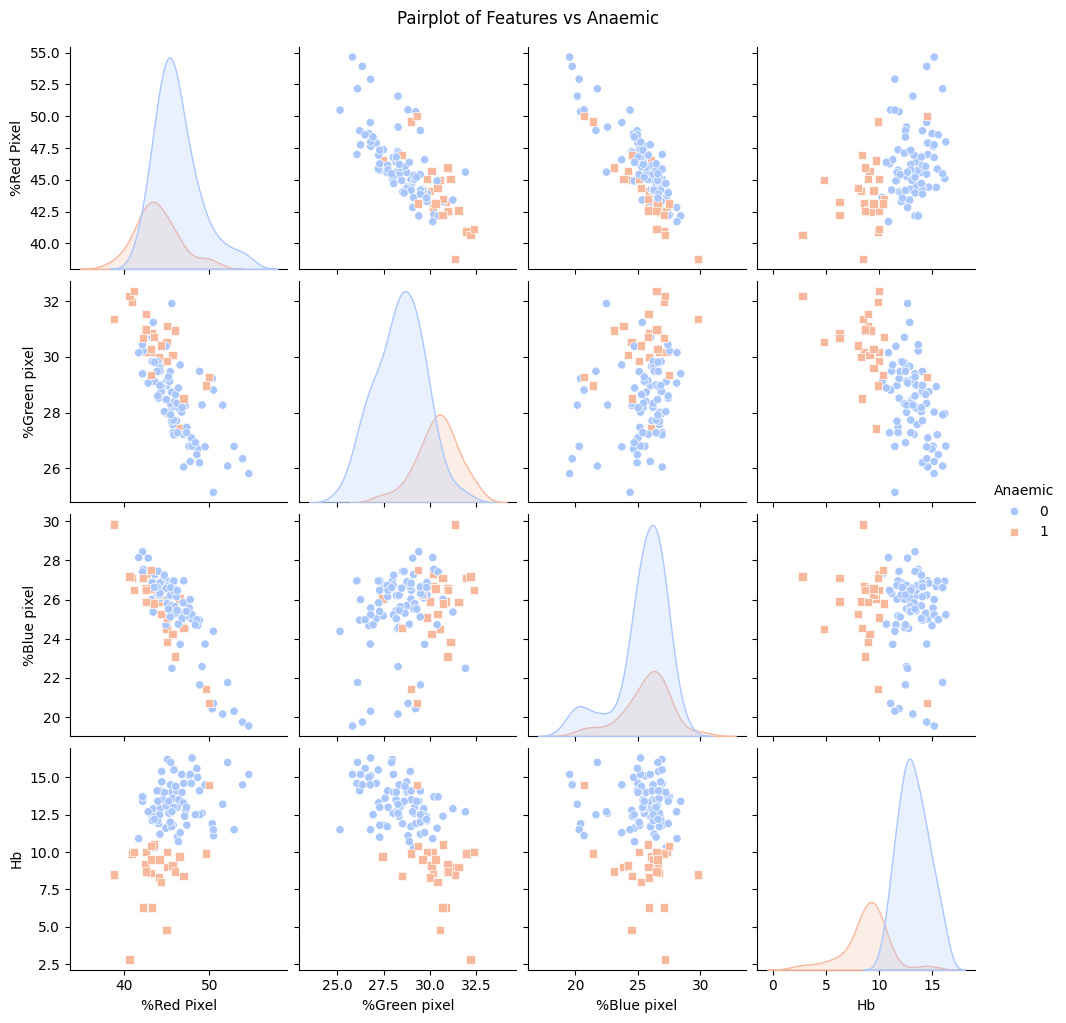

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize the relationships between features and target
sns.pairplot(df[['%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb', 'Anaemic']], hue='Anaemic', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pairplot of Features vs Anaemic', y=1.02)
plt.show()


## Random Forest

Random Forest - Accuracy: 0.9048
Random Forest - F1 Score: 0.8333

Random Forest - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21



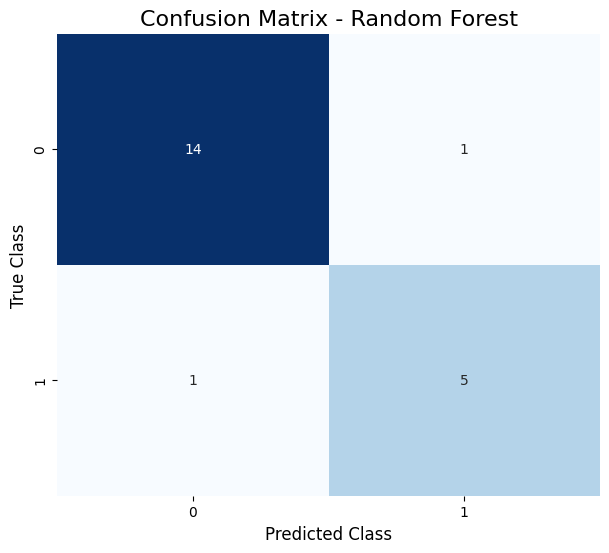

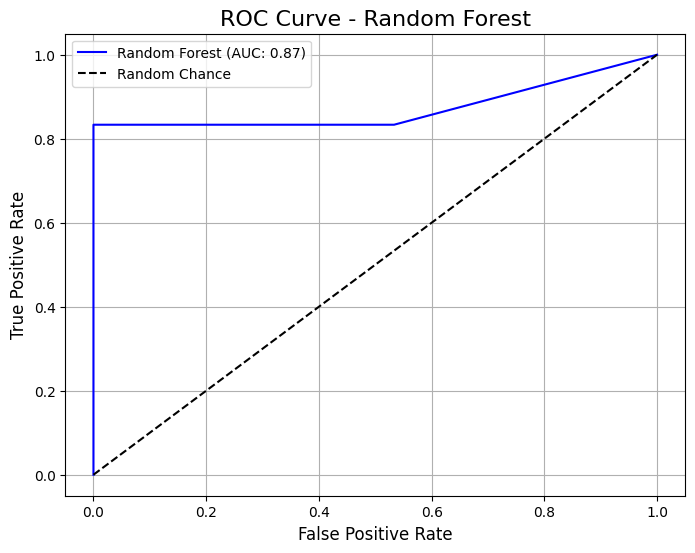

<ipython-input-53-9b5749c72c19>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


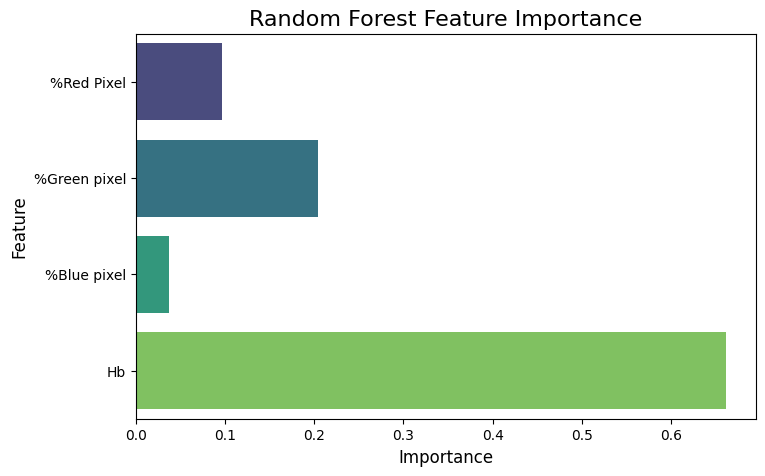

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score

# Example data split (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
rf_pred = rf_model.predict(X_test)
rf_pred_proba = rf_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred)
print(f"Random Forest - Accuracy: {accuracy:.4f}")
print(f"Random Forest - F1 Score: {f1:.4f}")

# Classification Report
print("\nRandom Forest - Classification Report:")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y), cbar=False)
plt.title("Confusion Matrix - Random Forest", fontsize=16)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, rf_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC: {auc(fpr, tpr):.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve - Random Forest", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(
    x=rf_model.feature_importances_,
    y=X.columns,
    palette=sns.color_palette("viridis", len(X.columns))
)
plt.title("Random Forest Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


## Gradient Boosting

Gradient Boosting - Accuracy: 0.9048
Gradient Boosting - F1 Score: 0.8333

Gradient Boosting - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21



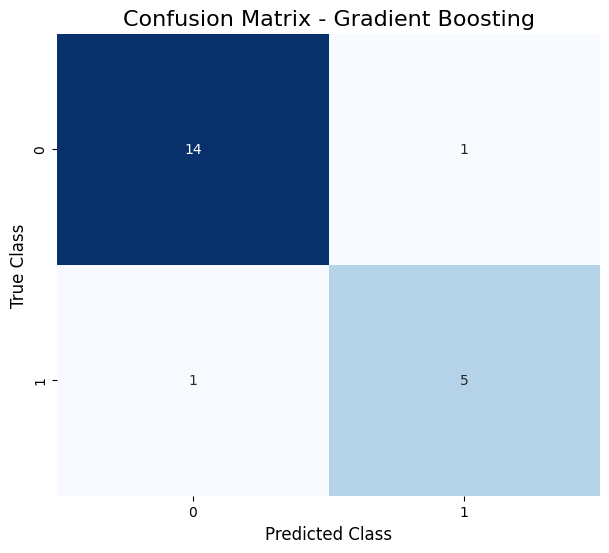

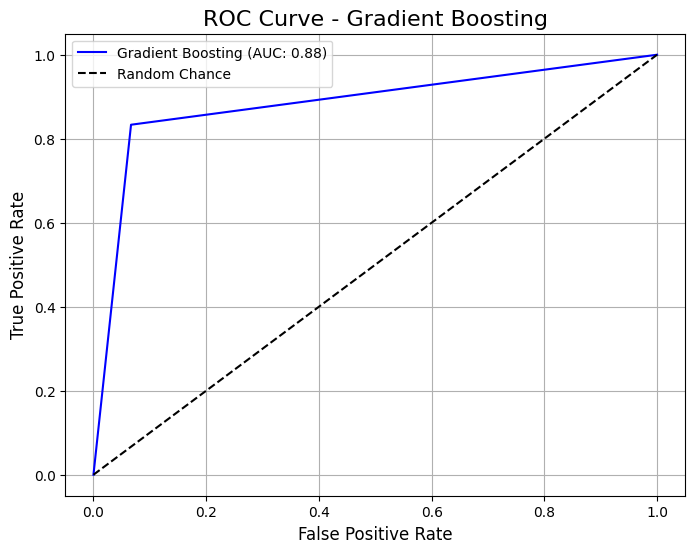

<ipython-input-56-9526e6af083c>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


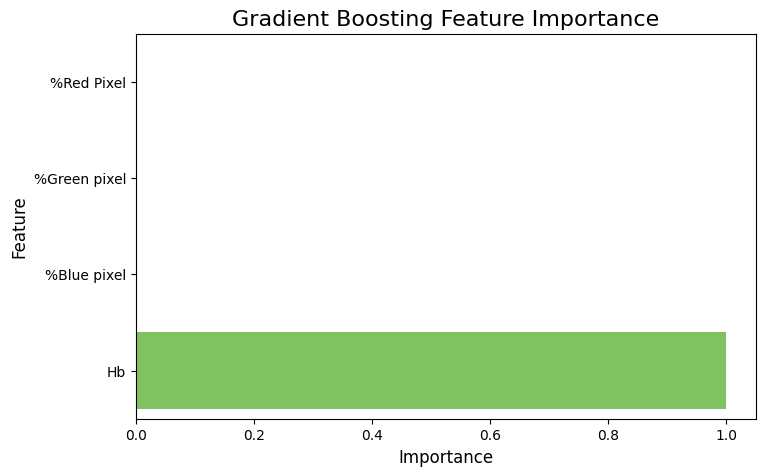

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score

# Example data split (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Train the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predictions
gb_pred = gb_model.predict(X_test)
gb_pred_proba = gb_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, gb_pred)
f1 = f1_score(y_test, gb_pred)
print(f"Gradient Boosting - Accuracy: {accuracy:.4f}")
print(f"Gradient Boosting - F1 Score: {f1:.4f}")

# Classification Report
print("\nGradient Boosting - Classification Report:")
print(classification_report(y_test, gb_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, gb_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y), cbar=False)
plt.title("Confusion Matrix - Gradient Boosting", fontsize=16)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, gb_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Gradient Boosting (AUC: {auc(fpr, tpr):.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve - Gradient Boosting", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

# Feature Importance
plt.figure(figsize=(8, 5))
sns.barplot(
    x=gb_model.feature_importances_,
    y=X.columns,
    palette=sns.color_palette("viridis", len(X.columns))
)
plt.title("Gradient Boosting Feature Importance", fontsize=16)
plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


## Stacking Approach

Stacking - Accuracy: 0.9048
Stacking - F1 Score: 0.8333

Stacking - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21



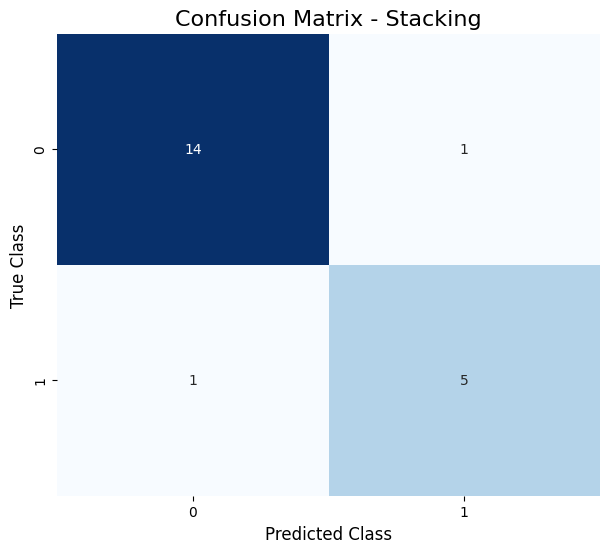

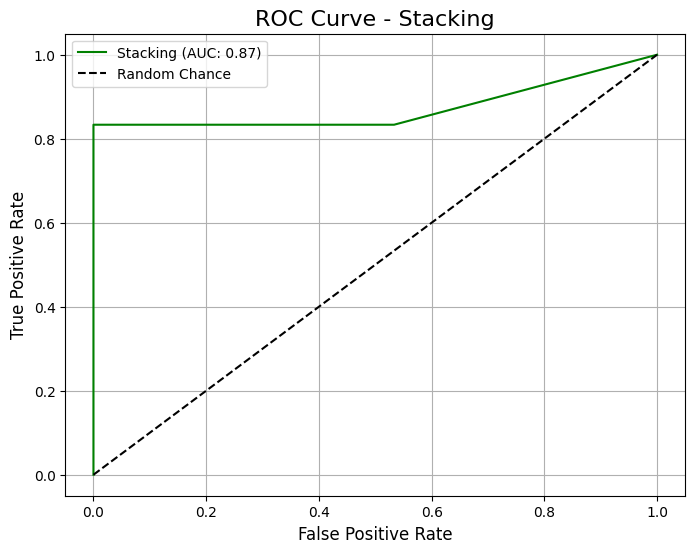

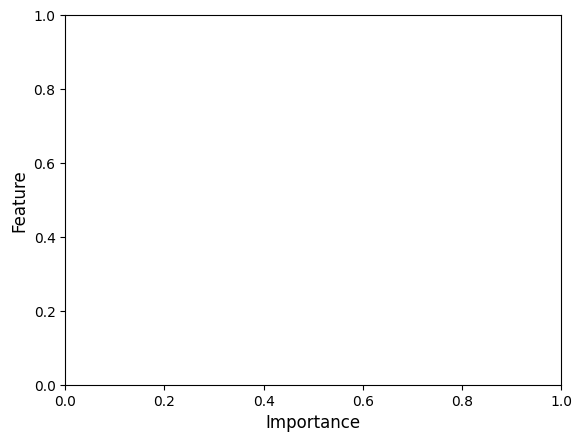

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score

# Example data split (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define base models (Random Forest and Gradient Boosting)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42))
]

# Define the meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Create the Stacking model
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the Stacking Classifier
stacking_model.fit(X_train, y_train)

# Predictions
stacking_pred = stacking_model.predict(X_test)
stacking_pred_proba = stacking_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, stacking_pred)
f1 = f1_score(y_test, stacking_pred)
print(f"Stacking - Accuracy: {accuracy:.4f}")
print(f"Stacking - F1 Score: {f1:.4f}")

# Classification Report
print("\nStacking - Classification Report:")
print(classification_report(y_test, stacking_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, stacking_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y), cbar=False)
plt.title("Confusion Matrix - Stacking", fontsize=16)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, stacking_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Stacking (AUC: {auc(fpr, tpr):.2f})", color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve - Stacking", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

plt.xlabel("Importance", fontsize=12)
plt.ylabel("Feature", fontsize=12)
plt.show()


## Combine multiple classifiers by voting.

Voting Classifier - Accuracy: 0.9048
Voting Classifier - F1 Score: 0.8333

Voting Classifier - Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.83      0.83      0.83         6

    accuracy                           0.90        21
   macro avg       0.88      0.88      0.88        21
weighted avg       0.90      0.90      0.90        21



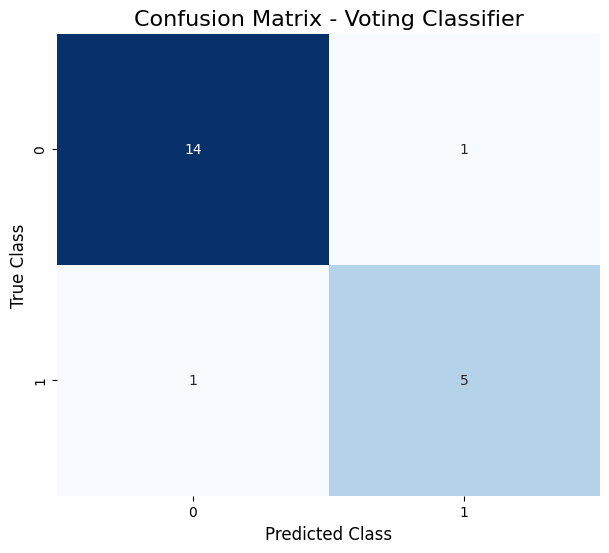

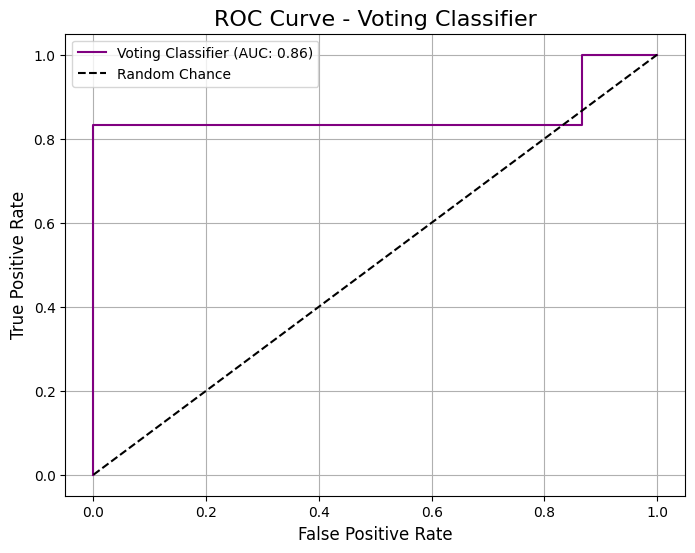

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score, f1_score

# Example data split (replace X and y with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define the base models (Random Forest, Gradient Boosting, SVC)
base_learners = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

# Create the Voting Classifier (Soft Voting)
vote_model = VotingClassifier(estimators=base_learners, voting='soft')

# Train the Voting Classifier
vote_model.fit(X_train, y_train)

# Predictions
vote_pred = vote_model.predict(X_test)
vote_pred_proba = vote_model.predict_proba(X_test)[:, 1]

# Metrics
accuracy = accuracy_score(y_test, vote_pred)
f1 = f1_score(y_test, vote_pred)
print(f"Voting Classifier - Accuracy: {accuracy:.4f}")
print(f"Voting Classifier - F1 Score: {f1:.4f}")

# Classification Report
print("\nVoting Classifier - Classification Report:")
print(classification_report(y_test, vote_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, vote_pred)
plt.figure(figsize=(7, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=set(y), yticklabels=set(y), cbar=False)
plt.title("Confusion Matrix - Voting Classifier", fontsize=16)
plt.xlabel("Predicted Class", fontsize=12)
plt.ylabel("True Class", fontsize=12)
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, vote_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Voting Classifier (AUC: {auc(fpr, tpr):.2f})", color='purple')
plt.plot([0, 1], [0, 1], 'k--', label='Random Chance')
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.title("ROC Curve - Voting Classifier", fontsize=16)
plt.legend()
plt.grid(True)
plt.show()


## Evaluation

In [ ]:
from sklearn.metrics import f1_score, recall_score, accuracy_score

# Evaluation for each model
print("Random Forest:")
print("  Accuracy:", accuracy_score(y_test, rf_pred))
print("  F1 Score:", f1_score(y_test, rf_pred))
print("  Recall:", recall_score(y_test, rf_pred))

print("\nGradient Boosting:")
print("  Accuracy:", accuracy_score(y_test, gb_pred))
print("  F1 Score:", f1_score(y_test, gb_pred))
print("  Recall:", recall_score(y_test, gb_pred))

print("\nStacking Model:")
print("  Accuracy:", accuracy_score(y_test, stacking_pred))
print("  F1 Score:", f1_score(y_test, stacking_pred))
print("  Recall:", recall_score(y_test, stacking_pred))

print("\nVoting Classifier:")
print("  Accuracy:", accuracy_score(y_test, vote_pred))
print("  F1 Score:", f1_score(y_test, vote_pred))
print("  Recall:", recall_score(y_test, vote_pred))



Random Forest:
  Accuracy: 0.9047619047619048
  F1 Score: 0.8333333333333334
  Recall: 0.8333333333333334

Gradient Boosting:
  Accuracy: 0.9047619047619048
  F1 Score: 0.8333333333333334
  Recall: 0.8333333333333334

Stacking Model:
  Accuracy: 0.9047619047619048
  F1 Score: 0.8333333333333334
  Recall: 0.8333333333333334

Voting Classifier:
  Accuracy: 0.9047619047619048
  F1 Score: 0.8333333333333334
  Recall: 0.8333333333333334


## Cross-Validation Performance Comparison

Random Forest Cross-Validation Accuracy: 0.9705 ± 0.0398
Gradient Boosting Cross-Validation Accuracy: 0.9319 ± 0.0508
Stacking Cross-Validation Accuracy: 0.9705 ± 0.0398
Voting Cross-Validation Accuracy: 0.9514 ± 0.0316


<ipython-input-66-4ddb762bedf0>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mean_accuracies.index, y=mean_accuracies.values, palette="viridis")


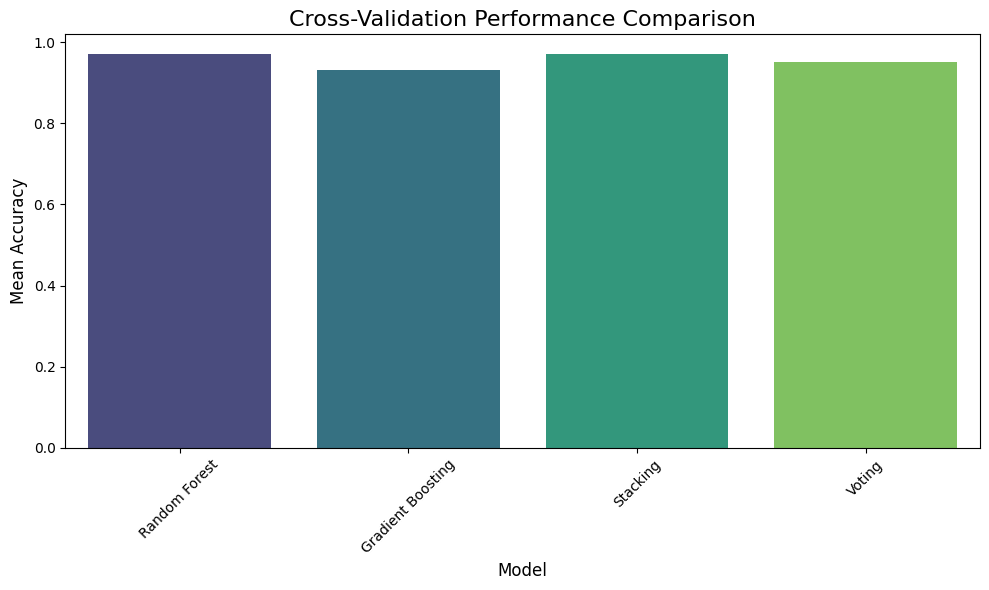

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# Cross-validation and comparison results storage
results = {}

# Loop through models and calculate cross-validation scores
for model_name, model in models.items():
    # Perform cross-validation with accuracy scoring
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Convert results into a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Calculate the mean accuracy for each model
mean_accuracies = results_df.mean()

# Plotting the cross-validation results using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_accuracies.index, y=mean_accuracies.values, palette="viridis")

plt.title("Cross-Validation Performance Comparison", fontsize=16)
plt.xlabel("Model", fontsize=12)
plt.ylabel("Mean Accuracy", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Visualizing Cross-Validation Results

Random Forest Cross-Validation Accuracy: 0.9705 ± 0.0398
Gradient Boosting Cross-Validation Accuracy: 0.9319 ± 0.0508
Stacking Cross-Validation Accuracy: 0.9610 ± 0.0478
Voting Cross-Validation Accuracy: 0.9610 ± 0.0372


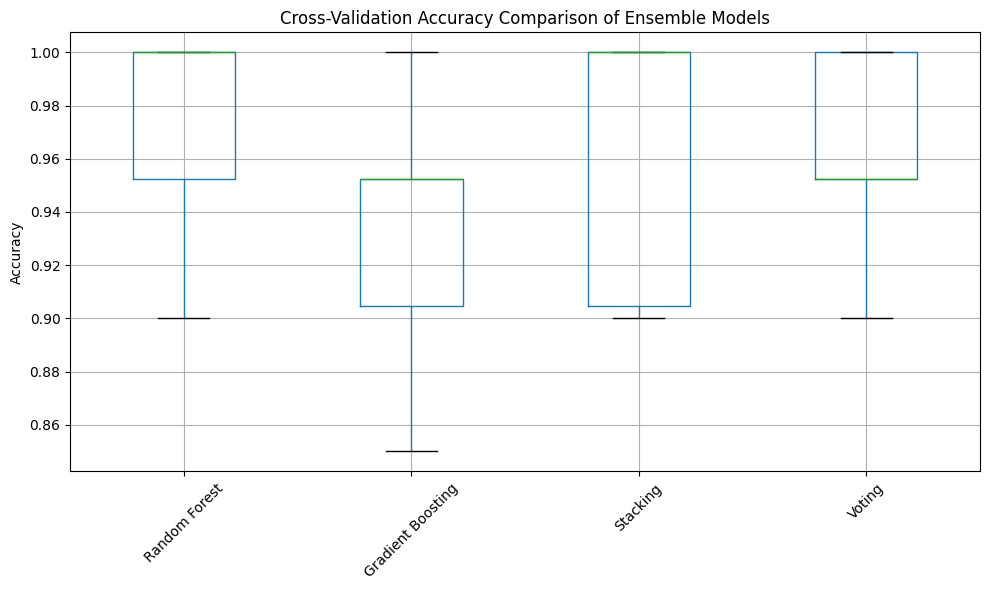

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# Perform cross-validation and store results
results = {}
for model_name, model in models.items():
    # Perform cross-validation and calculate accuracy
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')  # cv=5 for 5-fold cross-validation
    results[model_name] = scores
    print(f"{model_name} Cross-Validation Accuracy: {scores.mean():.4f} ± {scores.std():.4f}")

# Convert results into a DataFrame for easier plotting
results_df = pd.DataFrame(results)

# Plot box plot for model comparison
plt.figure(figsize=(10, 6))
results_df.boxplot()
plt.title("Cross-Validation Accuracy Comparison of Ensemble Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Confusion Matrix for Each Model

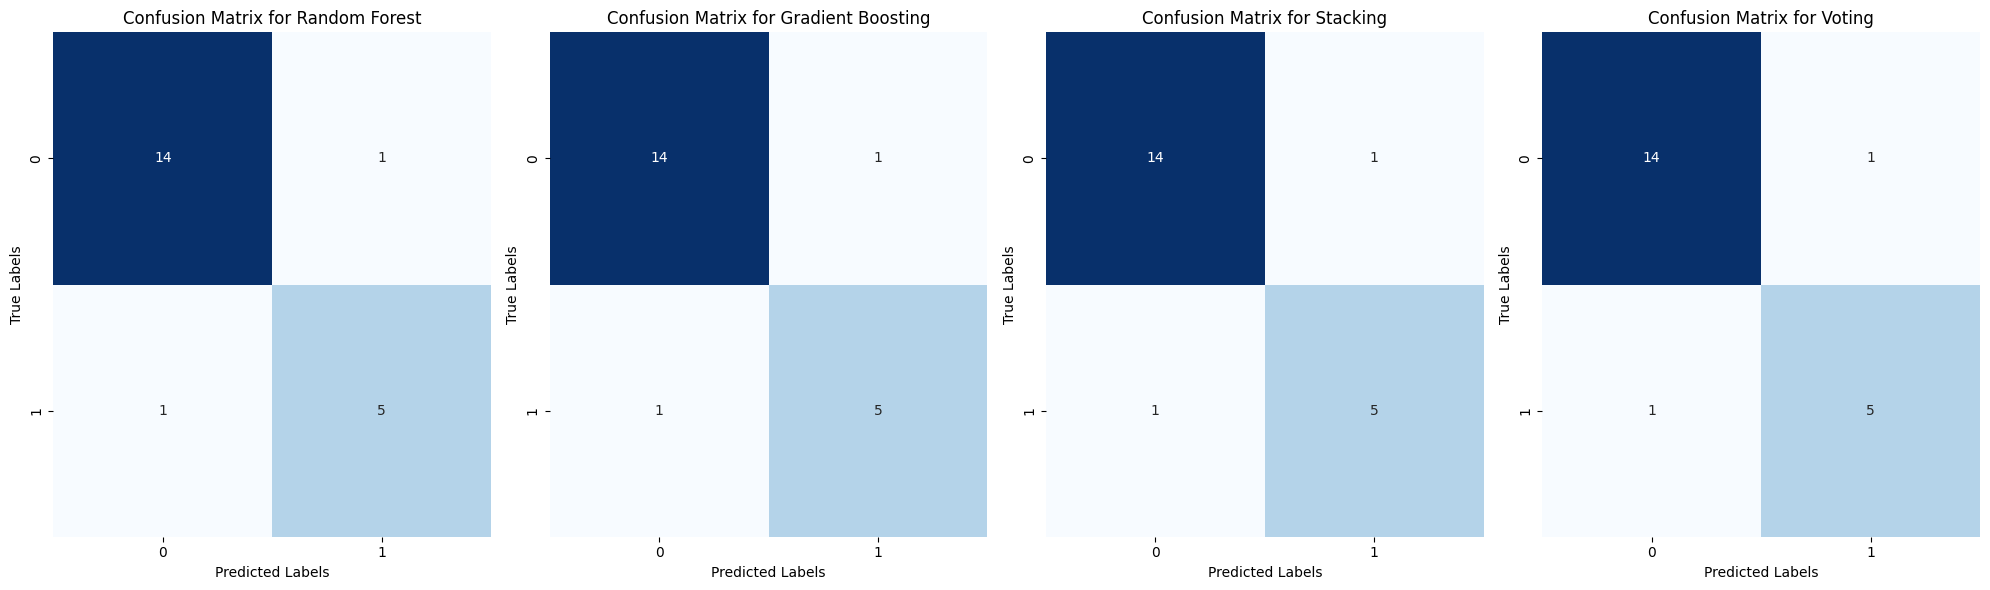

In [69]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Define the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[
            ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
            ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
            ('svc', SVC(probability=True))
        ],
        voting='soft'
    )
}

# Create a figure with subplots to display confusion matrices side by side
fig, axes = plt.subplots(1, len(models), figsize=(20, 6))  # 1 row, n columns (one for each model)
axes = axes.flatten()  # Flatten axes array for easy indexing

# Loop through models and plot confusion matrix on each subplot
for i, (model_name, model) in enumerate(models.items()):
    # Fit the model and predict on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix on corresponding subplot
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=axes[i])
    axes[i].set_title(f"Confusion Matrix for {model_name}")
    axes[i].set_xlabel("Predicted Labels")
    axes[i].set_ylabel("True Labels")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


## Precision and Recall for Each Model

In [70]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Fit each model on the training data and calculate precision, recall, and F1-score
for model_name, model in models.items():
    # Fit the model and predict on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate precision, recall, and F1-score
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Print the metrics
    print(f"{model_name} Performance Metrics:")
    print(f" - Precision: {precision:.4f}")
    print(f" - Recall: {recall:.4f}")
    print(f" - F1 Score: {f1:.4f}\n")


Random Forest Performance Metrics:
 - Precision: 0.9048
 - Recall: 0.9048
 - F1 Score: 0.9048

Gradient Boosting Performance Metrics:
 - Precision: 0.9048
 - Recall: 0.9048
 - F1 Score: 0.9048

Stacking Performance Metrics:
 - Precision: 0.9048
 - Recall: 0.9048
 - F1 Score: 0.9048

Voting Performance Metrics:
 - Precision: 0.9048
 - Recall: 0.9048
 - F1 Score: 0.9048



## Plot Learning Curves for All Models

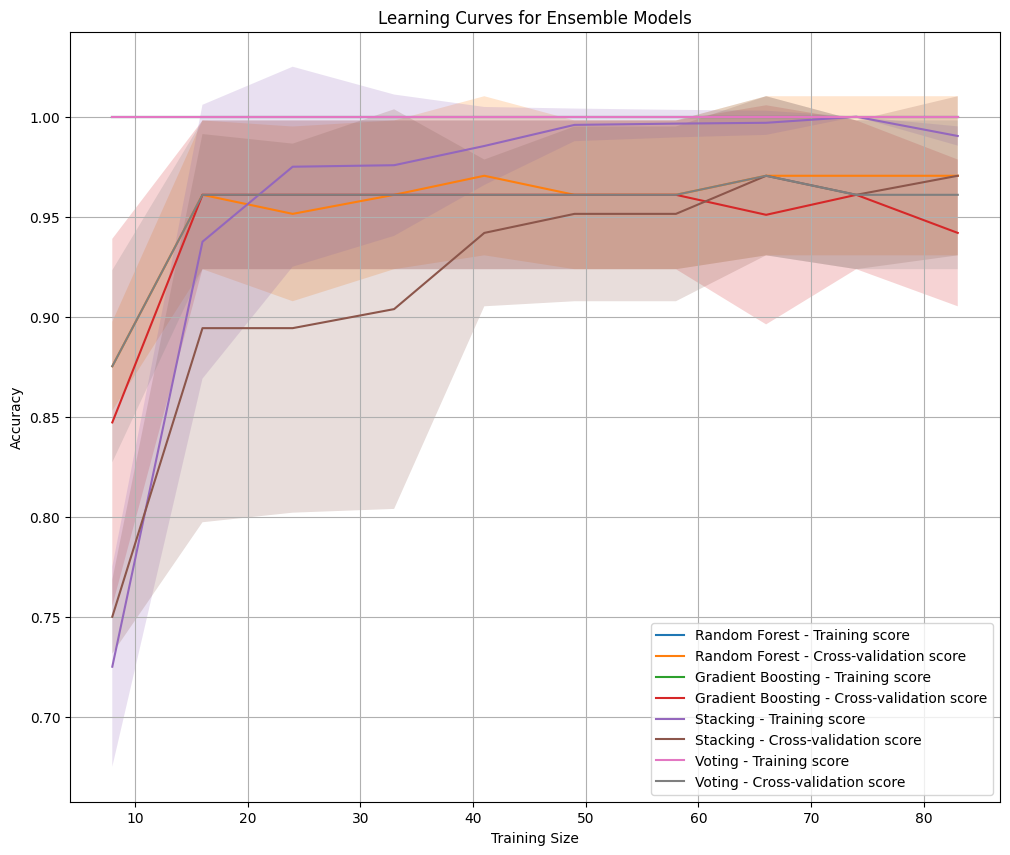

In [71]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np

# List of models to evaluate
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(
        estimators=[('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
                    ('svc', SVC(probability=True))],
        final_estimator=LogisticRegression()
    ),
    "Voting": VotingClassifier(
        estimators=[('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
                    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
                    ('svc', SVC(probability=True))],
        voting='soft'
    )
}

# Prepare the plot
plt.figure(figsize=(12, 10))

# Loop over each model to plot its learning curve
for model_name, model in models.items():
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
    )

    # Calculate mean and standard deviation for train and test scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Plot the learning curve
    plt.plot(train_sizes, train_mean, label=f'{model_name} - Training score')
    plt.plot(train_sizes, test_mean, label=f'{model_name} - Cross-validation score')

    # Fill between the standard deviation
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2)
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.2)

# Customize the plot
plt.title("Learning Curves for Ensemble Models")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


## Summary of Metrics

In [72]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# Initialize a list to collect metrics for all models
metrics_summary = []

# Loop through each model to calculate metrics
for model_name, model in models.items():
    # Fit the model and predict on the test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Append the metrics to the summary list
    metrics_summary.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Convert the summary list to a DataFrame
metrics_df = pd.DataFrame(metrics_summary)

# Display the model performance summary
print("Model Performance Summary:")
print(metrics_df)


Model Performance Summary:
               Model  Accuracy  Precision    Recall  F1 Score
0      Random Forest  0.904762   0.904762  0.904762  0.904762
1  Gradient Boosting  0.904762   0.904762  0.904762  0.904762
2           Stacking  0.904762   0.904762  0.904762  0.904762
3             Voting  0.904762   0.904762  0.904762  0.904762
